# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## Tips

<hr/>

### Maximum Likelihood Estimation (MLE)

- Likelihood: 가능도 또는 우도
- 최대 우도 추정, 최대 가능도 추정이라고 함
- 관찰한 데이터(Observation)을 가장 잘 설명하는 어떤 확률 분포 함수의 파라미터를 찾아내는 과정

동전이 있다고 해보자. 이 경우, 클래스는 2가지이다. 앞면이 나오는 경우와 뒷면이 나오는 경우이다.<br/>
**이항분포**가 된다. 즉, **베르누이 분포(Bernoulli Distribution)**이다.<br/>
Binomial distribution의 공식은 아래와 같다.

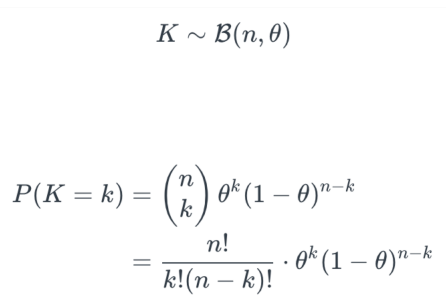

- Observation
    - n = 100
    - k = 27

이라고 가정해보자. 이 정보를 통해 θ를 찾을 것이다. 위 수식을 그래프로 그리면 다음과 같다.

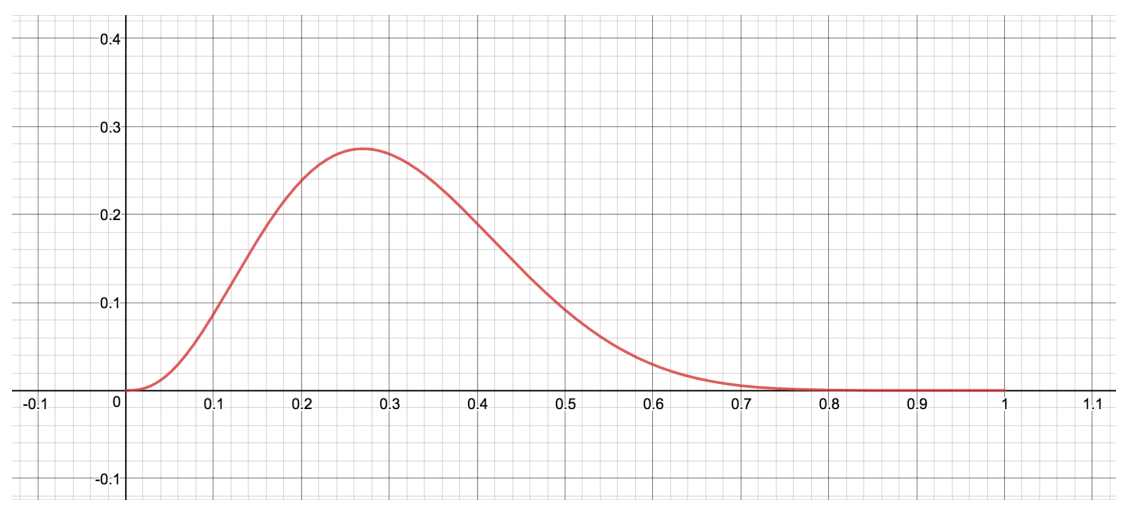

- y값이 최대가 되는 지점의 θ는 약 0.27로 추정되고 이 수치는 Observation을 가장 잘 설명하는 theta값이다.

<br/>

### Optimization via Gradient Descent

아래 그래프에서 y가 최대가 되는 지점을 찾으려면 **경사하강법**을 사용하면 된다. (최적화)<br/>

$ New θ = Old θ - α∇_θL(x;θ) $

- θ의 업데이트 (α = learning rate,∇ = 나블라(편미분 기호), L = loss 함수)    
- 손실 함수에 데이터와 θ가 주어졌을 때, 손실 함수의 값을 θ에 대해 편미분한 것을 α(learning rate)에 곱한 것을 빼준다.
- 최댓값(Local Maxima)와 최솟값(Local Minima)를 찾도록 도와 줄 수 있다.

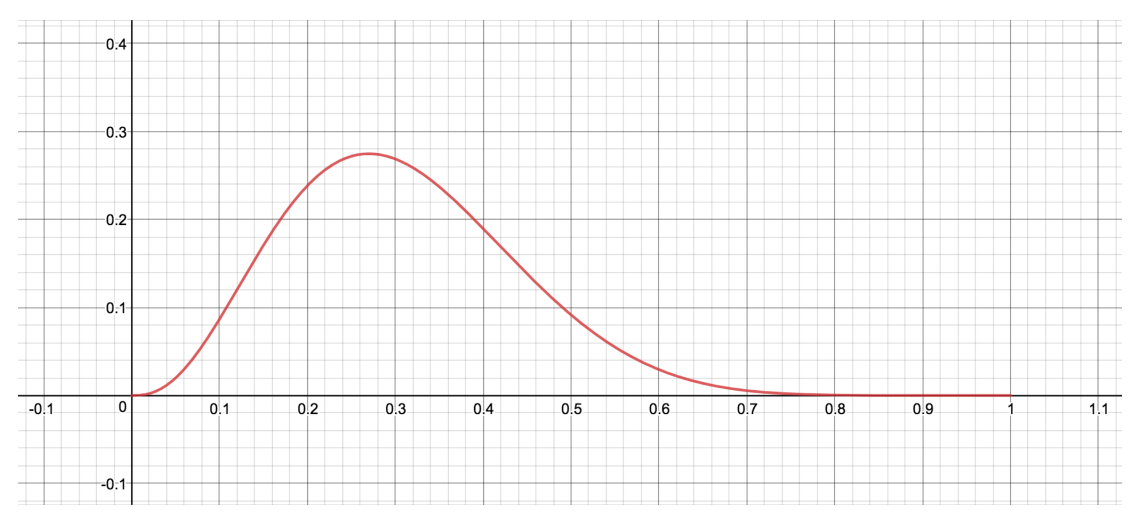

<br/>

### Overfitting

- MLE을 하면 숙명적으로 overfitting이 발생하게 된다.
- overfitting(과적합)이란 학습데이터를 과도하게 학습하는 것을 뜻한다.

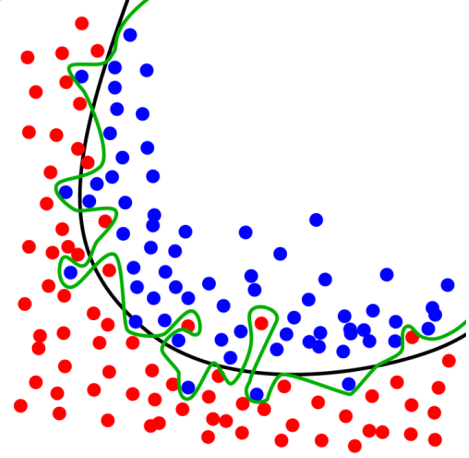

- 위 그림에서 초록색 선은 과적합(Overfitting)된 모델을, 검은색 선은 일반 모델을 나타낸다.

<br/>

#### Overfitting을 피하는 법?

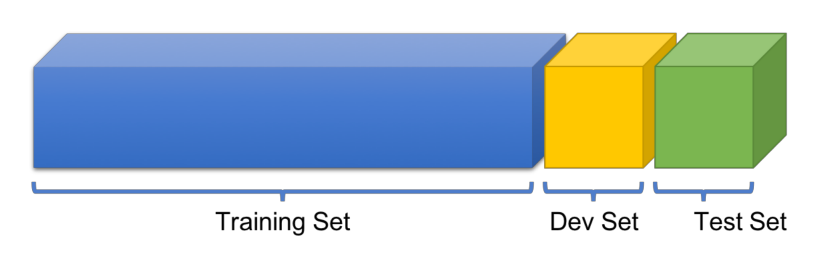

training set : test set : Dev set = 8 : 1\~2 : 0\~1 정도의 비율이다. (Dev set은 애초에 만들지 않을수도 있음)<br/>
수집한 Observaion을 훈련 set과 테스트 set을 나눠서 훈련 후, 해당 훈련이 얼마나 잘 학습되었는지를 검증해보자. training set이 MLE 통해 과도하게 학습되어버리면, test set에 대해 해당 모델이 좋은 성능을 내지 못할 것이다. 이를 통해 overfitting 되었는지를 판단할 수 있다. (training set으로 훈련, test set으로 검증) 이제 적합한 모델을 찾도록 반복하기만 하면 된다. <br/><br/>
그런데 test set에서 가장 좋은 성능을 가진 모델을 선택하도록 작업을 반복하면 trainig set과  test set에 대해 overfitting이 될 수도 있기 때문에 develoment set(또는 validation set)을 사용한다. trainig set으로 학습을 진행하고, Dev set으로 검증한 후, test set으로 테스트를 진행하면 훨씬 더 정확한 성능을 얻을 수 있다. 그러나 상황에 따라서는 Validation set을 따로 만들지 않고 test set에 합쳐 사용하기도 한다.

<br/>

- 그림 설명 (출처: https://www.ibm.com/cloud/learn/overfitting)
    - Number of iterations = Epochs
    - Validation set = Validation Loss
    - Training set = Training Loss

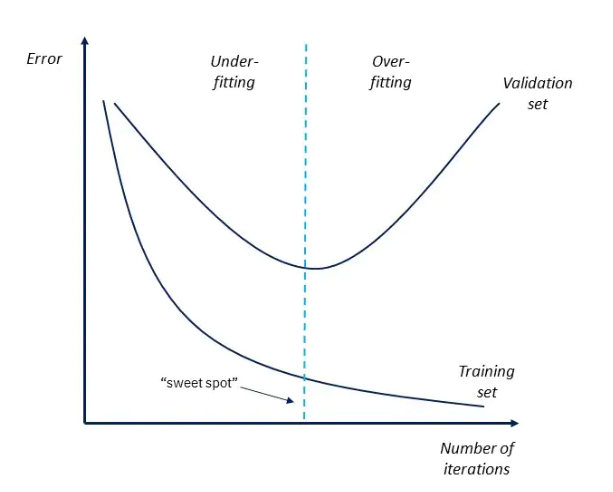

Validation Loss가 **가장 작은 지점**을 선택하는 것이 좋다. **"sweet spot"** 지점의 **epoch**에서의 모델을 선택하면 된다.

<br/>

#### Overfitting을 막는 추가적인 방법들

- **데이터를 많이 모아라!** 데이터가 적을수록 실제 분포에서 편향된 데이터를 얻을 가능성이 커지기 때문이다.
- **feature를 적게 사용하라!** 여기서 feature란 어떤 분포를 잘 설명하는 특징을 의미한다. (얼굴의 예 - 눈의 특징, 이빨의 특징, 코의 특징, 얼굴형의 특징 등등등) 데이터를 구분해주는 feature의 수를 줄이면 overfitting을 막을 수 있다.
- **regularization을 사용하자!** regularization은 여러가지 방법이 있다. 가장 많이 사용되는 것은 **Dropout**과 **Batch Normalization**이다.
    - **Early Stopping** : validation Loss가 더이상 낮아지지 않을 때 중지하는 기법
    - **Reducing Network Size** : neural network의 사이즈를 줄이는 방법(딥러닝에 한해서만) - 학습량을 줄여줌
    - **Weight Decay** : neural network weight 파라미터의 크기를 제한하는 방법
    - **Dropout** : (딥러닝에 한해서만 사용) 추후에 설명
    - **Batch Normalization** : (딥러닝에 한해서만 사용) 추후에 설명

### Deep Neural Network를 훈련하는 과정

1. Neural Network Architecture를 설계 (입력데이터의 개수, feature의 개수, 클래스의 개수에 softmax layer)
    - **input size**와 **output size**를 확정한다.
2. 훈련을 진행하고 Overfitting이 일어나는지 확인 
    - Overfitting이 될 때까지 사이즈를 늘려나간다. (중간의 layer의 깊이와 넓이를 늘려나간다. - I/O 제외)
    - Overfitting이 일어나면 regularization 기법을 사용해 Architecture에 regularization term을 추가해준다.(Dropout, Batch Normalization 등등)
3. 2번의 작업을 반복해준다.

<br/>

### 실습

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

<br/>

- Training Set과 Test Set을 분리한다.
- $ |x\_train| = (m, 3) $
- $ |y\_train| = (m, ) $
- $ |x\_test| = (m^{\prime}, 3) $
- $ |y\_test| = (m^{\prime}, ) $

In [3]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

<br/>

- Model 설계

In [8]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)       # |x| = (m, 3)  => (m, 3)

In [9]:
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

<br/>

#### Training

- $ |x\_train| = (m, 3) $
- $ |prediction| = (m, 3) $
- $ |y\_train| = (m, ) $

In [11]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))
    print("학습완료")

<br/>

#### Test

- $ |x\_test| = (m^{\prime}, 3) $
- $ |prediction| = (m^{\prime}, 3) $
- $ |y\_test| = (m^{\prime}, ) $

In [12]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [15]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 0.895360
Epoch    1/20 Cost: 0.890797
Epoch    2/20 Cost: 0.886333
Epoch    3/20 Cost: 0.881965
Epoch    4/20 Cost: 0.877688
Epoch    5/20 Cost: 0.873499
Epoch    6/20 Cost: 0.869395
Epoch    7/20 Cost: 0.865373
Epoch    8/20 Cost: 0.861432
Epoch    9/20 Cost: 0.857567
Epoch   10/20 Cost: 0.853776
Epoch   11/20 Cost: 0.850057
Epoch   12/20 Cost: 0.846408
Epoch   13/20 Cost: 0.842827
Epoch   14/20 Cost: 0.839311
Epoch   15/20 Cost: 0.835858
Epoch   16/20 Cost: 0.832466
Epoch   17/20 Cost: 0.829135
Epoch   18/20 Cost: 0.825861
Epoch   19/20 Cost: 0.822643
학습완료


In [16]:
test(model, optimizer, x_test, y_test)

Accuracy: 100.0% Cost: 0.199402


<br/>

### Learning Rate

- 적정한 학습률을 정하는 것은 아주 중요하다.
- learning rate가 너무 크면 발산(diverge)하면서 cost가 점점 늘어난다 (overshooting).

In [18]:
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e5)

# 학습
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 720868.875000
Epoch    2/20 Cost: 1323870.500000
Epoch    3/20 Cost: 1948224.750000
Epoch    4/20 Cost: 887933.125000
Epoch    5/20 Cost: 1134162.375000
Epoch    6/20 Cost: 1173993.875000
Epoch    7/20 Cost: 1576995.500000
Epoch    8/20 Cost: 1256037.375000
Epoch    9/20 Cost: 1141058.000000
Epoch   10/20 Cost: 691181.312500
Epoch   11/20 Cost: 1377912.500000
Epoch   12/20 Cost: 1830120.500000
Epoch   13/20 Cost: 563849.875000
Epoch   14/20 Cost: 1395108.000000
Epoch   15/20 Cost: 923993.812500
Epoch   16/20 Cost: 705254.625000
Epoch   17/20 Cost: 1287933.250000
Epoch   18/20 Cost: 914604.125000
Epoch   19/20 Cost: 886079.500000
학습완료


<br/>

- learning rate이 너무 작으면 cost가 거의 줄어들지 않는다.

In [19]:
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-10)

# 학습
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.939317
Epoch    1/20 Cost: 2.939317
Epoch    2/20 Cost: 2.939317
Epoch    3/20 Cost: 2.939317
Epoch    4/20 Cost: 2.939317
Epoch    5/20 Cost: 2.939317
Epoch    6/20 Cost: 2.939317
Epoch    7/20 Cost: 2.939317
Epoch    8/20 Cost: 2.939317
Epoch    9/20 Cost: 2.939317
Epoch   10/20 Cost: 2.939317
Epoch   11/20 Cost: 2.939317
Epoch   12/20 Cost: 2.939317
Epoch   13/20 Cost: 2.939317
Epoch   14/20 Cost: 2.939317
Epoch   15/20 Cost: 2.939317
Epoch   16/20 Cost: 2.939317
Epoch   17/20 Cost: 2.939317
Epoch   18/20 Cost: 2.939317
Epoch   19/20 Cost: 2.939317
학습완료


<br/>

### 데이터 전처리 Data PreProcessing

경사하강법을 통해서 최적화를 수행하기 때문에 전처리를 통해 데이터를 미리 학습하기 쉽도록 바꿔주는 것이 굉장히 중요하다.

<br/>

- 데이터를 zero-center하고 정규화(normalize)하자.

- Zero-centered란 그래프의 중심 0인 형태로 함숫값이 양수 혹은 음수에만 치우치지 않고 실수 전체에서 나타나는 형태를 의미한다.

In [20]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

- 정규분포화 standardization을 사용해 데이터 전처리
- 정규분포 \~N(0,1)를 따르는 training set를 만듦

$$ x^{\prime}_j = \frac{x_j - μ_j}{σ_j} $$

σ(시그마)는 표준편차(standard deviation)이고, μ(뮤)는 평균값이다.

In [21]:
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
norm_x_train = (x_train - mu) / sigma
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


<br/>

- 정규화(Normalize)와 zero center한 X(training set)로 학습해서 성능을 보자

In [22]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [23]:
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [24]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [25]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29474.621094
Epoch    1/20 Cost: 18722.042969
Epoch    2/20 Cost: 11941.123047
Epoch    3/20 Cost: 7630.646973
Epoch    4/20 Cost: 4880.464844
Epoch    5/20 Cost: 3122.821289
Epoch    6/20 Cost: 1998.640259
Epoch    7/20 Cost: 1279.364014
Epoch    8/20 Cost: 819.077332
Epoch    9/20 Cost: 524.501465
Epoch   10/20 Cost: 335.968170
Epoch   11/20 Cost: 215.298920
Epoch   12/20 Cost: 138.062103
Epoch   13/20 Cost: 88.621628
Epoch   14/20 Cost: 56.971245
Epoch   15/20 Cost: 36.706795
Epoch   16/20 Cost: 23.729731
Epoch   17/20 Cost: 15.416880
Epoch   18/20 Cost: 10.089418
Epoch   19/20 Cost: 6.672885


#### 만약 |y_train|이 (m, )이 아니라 (m, 2) 였다면?

$$ \begin{bmatrix}1000&0.1\\999&0.2\\1010&-0.3\\...&... \end{bmatrix} $$

위와 같은 값이 있다고 해보자. 만약 **전처리없이** MSE를 이용해 최적화를 수행하면 Neural Network는 column의 **큰 값에만 집중**을 하게 될 것이다. 하지만 **전처리를 수행한다면** σ(시그마)와 μ(뮤)에 따라 비슷한 값의 범위로 바뀔 것이고 Neural Network는 동등하게 이 둘을 학습할 수 있게 된다.

<br/>

###  Regularization을 포함한 모델 (Overfitting 방지)

In [26]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [27]:
model = MultivariateLinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29648.953125
Epoch    2/20 Cost: 18888.650391
Epoch    3/20 Cost: 12114.510742
Epoch    4/20 Cost: 7807.997070
Epoch    5/20 Cost: 5060.242188
Epoch    6/20 Cost: 3304.121582
Epoch    7/20 Cost: 2180.908936
Epoch    8/20 Cost: 1462.253662
Epoch    9/20 Cost: 1002.366943
Epoch   10/20 Cost: 708.050171
Epoch   11/20 Cost: 519.685791
Epoch   12/20 Cost: 399.127502
Epoch   13/20 Cost: 321.964600
Epoch   14/20 Cost: 272.574799
Epoch   15/20 Cost: 240.960114
Epoch   16/20 Cost: 220.721405
Epoch   17/20 Cost: 207.763901
Epoch   18/20 Cost: 199.466415
Epoch   19/20 Cost: 194.151688
Epoch   20/20 Cost: 190.746078
